#### Transforming Numerical Variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv('Travel.csv')


In [4]:
num_col=[fea for fea in data.columns if (data[fea].dtype !='O' and data[fea].dtype !=int)]

num_col

['CustomerID',
 'ProdTaken',
 'Age',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [5]:
cat_col=[fea for fea in data.columns if data[fea].dtype =='O'] 
cat_col

['TypeofContact',
 'Occupation',
 'Gender',
 'ProductPitched',
 'MaritalStatus',
 'Designation']

In [6]:
#Using sklearn
import scipy.stats as stats
from sklearn.preprocessing import FunctionTransformer
X=data[num_col]


In [8]:
# Performing Mean Imputation
for var in num_col:
    value=X[var].mean()
    X[var]=X[var].fillna(value)


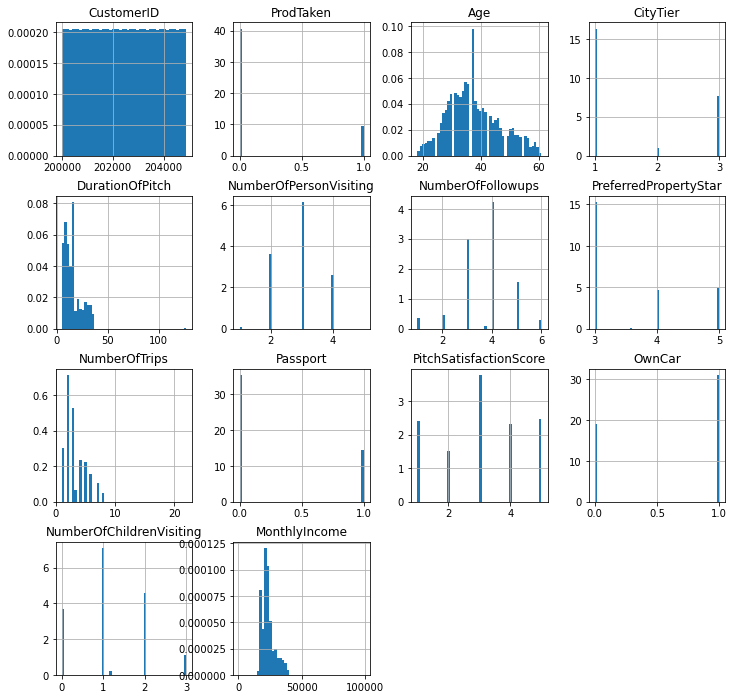

In [9]:
X.hist(bins=50,figsize=(12,12),density=True)
plt.show()


In [10]:
# creating a copy of the orginal dataframe using pandas copy()
X_tf=X.copy()
# Appling log transformation
X_tf=np.log(X_tf)
X_tf


,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,12.206073,0.0,3.713572,1.098612,1.791759,1.098612,1.098612,1.098612,0.000000,0.0,0.693147,0.0,-inf,9.951944
1,12.206078,-inf,3.891820,0.000000,2.639057,1.098612,1.386294,1.386294,0.693147,-inf,1.098612,0.0,0.693147,9.909967
2,12.206083,0.0,3.610918,0.000000,2.079442,1.098612,1.386294,1.098612,1.945910,0.0,1.098612,-inf,-inf,9.746249
3,12.206088,-inf,3.496508,0.000000,2.197225,0.693147,1.098612,1.098612,0.693147,0.0,1.609438,0.0,0.000000,9.793059
4,12.206093,-inf,3.627596,0.000000,2.079442,0.693147,1.098612,1.386294,0.000000,-inf,1.609438,0.0,-inf,9.823795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,12.230194,0.0,3.891820,1.098612,2.197225,1.098612,1.609438,1.386294,0.693147,0.0,0.000000,0.0,0.000000,10.187764
4884,12.230199,0.0,3.332205,0.000000,3.433987,1.386294,1.609438,1.098612,1.098612,0.0,1.098612,0.0,0.693147,9.962322
4885,12.230204,0.0,3.951244,1.098612,2.833213,1.386294,1.386294,1.386294,1.945910,-inf,0.000000,0.0,1.098612,10.367850
4886,12.230209,0.0,2.944439,1.098612,2.772589,1.098612,1.386294,1.098612,1.098612,-inf,1.609438,-inf,0.693147,9.917834


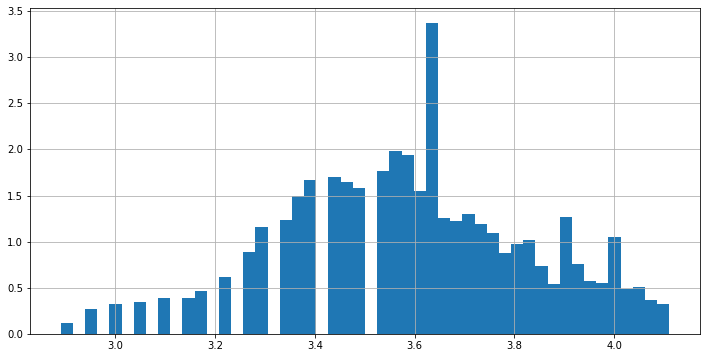

In [11]:
X_tf_1=X_tf['Age']
X_tf_1.hist(bins=50,figsize=(12,6),density=True)
plt.show()


In [12]:
#Using sklearn
transformer=FunctionTransformer(np.log)


In [13]:
data_tf=transformer.transform(X_tf)


In [14]:
data_tf=pd.DataFrame(data_tf)

In [15]:
data_tf


,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,2.501934,-inf,1.311994,0.094048,0.583198,0.094048,0.094048,0.094048,-inf,-inf,-0.366513,-inf,NaN,2.297768
1,2.501934,NaN,1.358877,-inf,0.970422,0.094048,0.326634,0.326634,-0.366513,NaN,0.094048,-inf,-0.366513,2.293541
2,2.501934,-inf,1.283962,-inf,0.732099,0.094048,0.326634,0.094048,0.665730,-inf,0.094048,NaN,NaN,2.276882
3,2.501935,NaN,1.251765,-inf,0.787195,-0.366513,0.094048,0.094048,-0.366513,-inf,0.475885,-inf,-inf,2.281674
4,2.501935,NaN,1.288570,-inf,0.732099,-0.366513,0.094048,0.326634,-inf,NaN,0.475885,-inf,NaN,2.284807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,2.503908,-inf,1.358877,0.094048,0.787195,0.094048,0.475885,0.326634,-0.366513,-inf,-inf,-inf,-inf,2.321187
4884,2.503908,-inf,1.203634,-inf,1.233722,0.326634,0.475885,0.094048,0.094048,-inf,0.094048,-inf,-0.366513,2.298810
4885,2.503909,-inf,1.374030,0.094048,1.041412,0.326634,0.326634,0.326634,0.665730,NaN,-inf,-inf,0.094048,2.338710
4886,2.503909,-inf,1.079918,0.094048,1.019781,0.094048,0.326634,0.094048,0.094048,NaN,0.475885,NaN,-0.366513,2.294335


In [16]:
# Using Numpy
X_input=X['Age']
np.reciprocal(X_input)


0       0.024390
1       0.020408
2       0.027027
3       0.030303
4       0.026580
          ...   
4883    0.020408
4884    0.035714
4885    0.019231
4886    0.052632
4887    0.027778
Name: Age, Length: 4888, dtype: float64

In [17]:
X_input=X['Age']
X_input
#Using sklearn
transformer=FunctionTransformer(np.reciprocal)
X_input=transformer.transform(X_input)
X_input


0       0.024390
1       0.020408
2       0.027027
3       0.030303
4       0.026580
          ...   
4883    0.020408
4884    0.035714
4885    0.019231
4886    0.052632
4887    0.027778
Name: Age, Length: 4888, dtype: float64

#### Method 3: Transforming variables with square root and cube root

In [19]:
#Using numpy
data=pd.read_csv('Travel.csv')
X=data[num_col]
X_tf=np.sqrt(X)
X_tf


,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,447.213595,1.0,6.403124,1.732051,2.449490,1.732051,1.732051,1.732051,1.000000,1.0,1.414214,1.0,0.000000,144.889613
1,447.214714,0.0,7.000000,1.000000,3.741657,1.732051,2.000000,2.000000,1.414214,0.0,1.732051,1.0,1.414214,141.880231
2,447.215832,1.0,6.082763,1.000000,2.828427,1.732051,2.000000,1.732051,2.645751,1.0,1.732051,0.0,0.000000,130.728727
3,447.216950,0.0,5.744563,1.000000,3.000000,1.414214,1.732051,1.732051,1.414214,1.0,2.236068,1.0,1.000000,133.824512
4,447.218068,0.0,NaN,1.000000,2.828427,1.414214,1.732051,2.000000,1.000000,0.0,2.236068,1.0,0.000000,135.897020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,452.640034,1.0,7.000000,1.732051,3.000000,1.732051,2.236068,2.000000,1.414214,1.0,1.000000,1.0,1.000000,163.021471
4884,452.641138,1.0,5.291503,1.000000,5.567764,2.000000,2.236068,1.732051,1.732051,1.0,1.732051,1.0,1.414214,145.643400
4885,452.642243,1.0,7.211103,1.732051,4.123106,2.000000,2.000000,2.000000,2.645751,0.0,1.000000,1.0,1.732051,178.381613
4886,452.643347,1.0,4.358899,1.732051,4.000000,1.732051,2.000000,1.732051,1.732051,0.0,2.236068,0.0,1.414214,142.439461


In [20]:
 #using sklearn
data=pd.read_csv('Travel.csv')
X=data[num_col]
transformer=FunctionTransformer(np.sqrt)
X=transformer.transform(X)
X

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,447.213595,1.0,6.403124,1.732051,2.449490,1.732051,1.732051,1.732051,1.000000,1.0,1.414214,1.0,0.000000,144.889613
1,447.214714,0.0,7.000000,1.000000,3.741657,1.732051,2.000000,2.000000,1.414214,0.0,1.732051,1.0,1.414214,141.880231
2,447.215832,1.0,6.082763,1.000000,2.828427,1.732051,2.000000,1.732051,2.645751,1.0,1.732051,0.0,0.000000,130.728727
3,447.216950,0.0,5.744563,1.000000,3.000000,1.414214,1.732051,1.732051,1.414214,1.0,2.236068,1.0,1.000000,133.824512
4,447.218068,0.0,NaN,1.000000,2.828427,1.414214,1.732051,2.000000,1.000000,0.0,2.236068,1.0,0.000000,135.897020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,452.640034,1.0,7.000000,1.732051,3.000000,1.732051,2.236068,2.000000,1.414214,1.0,1.000000,1.0,1.000000,163.021471
4884,452.641138,1.0,5.291503,1.000000,5.567764,2.000000,2.236068,1.732051,1.732051,1.0,1.732051,1.0,1.414214,145.643400
4885,452.642243,1.0,7.211103,1.732051,4.123106,2.000000,2.000000,2.000000,2.645751,0.0,1.000000,1.0,1.732051,178.381613
4886,452.643347,1.0,4.358899,1.732051,4.000000,1.732051,2.000000,1.732051,1.732051,0.0,2.236068,0.0,1.414214,142.439461


#### Method 4: Transforming variables with power transformations


In [21]:
#using sklearn
data=pd.read_csv('Travel.csv')
X=data[num_col]
transformer=FunctionTransformer(lambda x: np.power(x,0.3))
X=transformer.transform(X)
X


,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,38.932205,1.0,3.046738,1.390389,1.711770,1.390389,1.390389,1.390389,1.000000,1.0,1.231144,1.0,0.000000,19.798047
1,38.932263,0.0,3.214096,1.000000,2.207183,1.390389,1.515717,1.515717,1.231144,0.0,1.390389,1.0,1.231144,19.550287
2,38.932322,1.0,2.954340,1.000000,1.866066,1.390389,1.515717,1.390389,1.792790,1.0,1.390389,0.0,0.000000,18.613267
3,38.932380,0.0,2.854659,1.000000,1.933182,1.231144,1.390389,1.390389,1.231144,1.0,1.620657,1.0,1.000000,18.876497
4,38.932438,0.0,NaN,1.000000,1.866066,1.231144,1.390389,1.515717,1.000000,0.0,1.620657,1.0,0.000000,19.051359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,39.214960,1.0,3.214096,1.390389,1.933182,1.390389,1.620657,1.515717,1.231144,1.0,1.000000,1.0,1.000000,21.249410
4884,39.215018,1.0,2.717361,1.000000,2.801615,1.515717,1.620657,1.390389,1.390389,1.0,1.390389,1.0,1.231144,19.859782
4885,39.215075,1.0,3.271907,1.390389,2.339563,1.515717,1.515717,1.515717,1.792790,0.0,1.000000,1.0,1.390389,22.429007
4886,39.215132,1.0,2.418945,1.390389,2.297397,1.390389,1.515717,1.390389,1.390389,0.0,1.620657,0.0,1.231144,19.596486


#### Method 5: Transforming Numerical variables with Box-Cox transformations

In [23]:
 #defined by (X**(lambda)-1)/X
#lambda is transformation parameter and X is the variable
data=pd.read_csv('Travel.csv')
X=data[num_col]
# Performing Mean Imputation
for var in num_col:
    value=X[var].mean()
    X[var]=X[var].fillna(value)
    X_in=X['Age'].array.reshape(-1, 1)
from sklearn.preprocessing import PowerTransformer
#using sklearn
transformer=PowerTransformer(method='box-cox',standardize=False)
transformer.fit(X_in)
X_1=transformer.transform(X_in)

#### Method 6: Transforming Numerical variables with Yeo-Johnson transformation


In [25]:
data=pd.read_csv('Travel.csv')
X=data[num_col]
# Performing Mean Imputation
for var in num_col:
    value=X[var].mean()
    X[var]=X[var].fillna(value)
    X_in=X['Age'].array.reshape(-1, 1)
from sklearn.preprocessing import PowerTransformer
#using sklearn
transformer=PowerTransformer(method='yeo-johnson',standardize=False)
transformer.fit(X_in)
X_1=transformer.transform(X_in)
